## Multiple Regression

---

###### Import required modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

---

###### Load data, set X & y and put the data into the pandas dataframe (in multiple regression, we should have more than one dependent features):

In [2]:
X, y = make_regression(n_samples=100, n_features=2, random_state=0)
df = pd.DataFrame(X, columns=["Feature-1", "Feature-2"])
df["Labels"] = y
df

,Feature-1,Feature-2,Labels
0,1.469359,1.532779,190.370562
1,-1.602058,0.625231,13.339570
2,-1.347759,1.883151,141.772669
3,1.222445,-0.403177,-3.069627
4,1.543015,-0.739563,-26.062465
...,...,...,...
95,-0.578850,-0.870797,-100.676095
96,0.439392,-1.491258,-130.612773
97,-0.187184,0.045759,-1.066852
98,1.054452,-1.070753,-72.194043


---

###### Display the primitive diagram with all data:

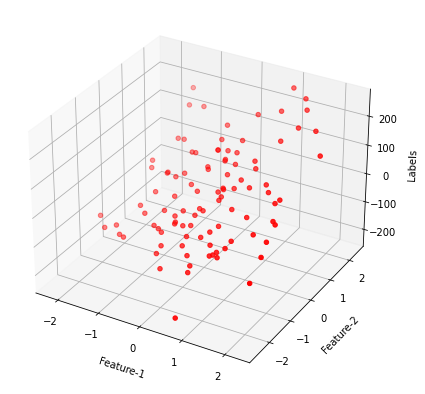

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_xlabel("\nFeature-1")
ax.set_ylabel("\nFeature-2")
ax.set_zlabel("\nLabels")
plt.show()

---

###### Grouping the data to train and test the model, train the model with training data and get the intercept (b0 in f(x) = b0 + b1 * x1 + b2 * x2) and the slopes (b1 & b2 in f(x) = b0 + b1 * x1 + b2 * x2):

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LinearRegression().fit(X_train, y_train)
intercept = model.intercept_
slopes = model.coef_
print(f"Intercept = {intercept}\nSlopes = {slopes}")

Intercept = 1.1324274851176597e-14
Slopes = [29.21475268 96.19363785]


---

###### We can get the r (r representative the correlation). If r_sq_train is much higher than r_sq_test, overfitting has occurred. So:

In [5]:
r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)
print(f"Train Data Correlation: {round(r_sq_train*100, 2)}%\nTest Data Correlation: {round(r_sq_test*100, 2)}%")

Train Data Correlation: 100.0%
Test Data Correlation: 100.0%


---

###### Get predict from the model and calculate its accuracy:

In [6]:
forecasts = model.predict(X_test)
modelAccuracy = r2_score(y_test, forecasts)
print(f"Model Accuracy: {round(modelAccuracy*100, 2)}%")

Model Accuracy: 100.0%


---

###### Display the related diagram with the surface:

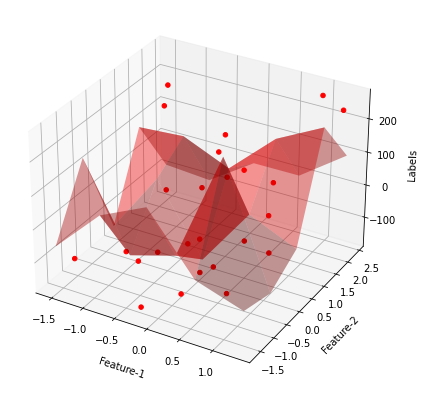

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")
ax.scatter(X_test[:, 0], X_test[:, 1], forecasts, color="red", alpha=1)
X_surf, y_surf = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 5), np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 5))
ax.plot_surface(X_surf, y_surf, np.array(forecasts).reshape(X_surf.shape), color="red", alpha =0.4)
ax.set_xlabel("\nFeature-1")
ax.set_ylabel("\nFeature-2")
ax.set_zlabel("\nLabels")
plt.show()

---

## End